## 📥 Load and Inspect Data

We begin by loading the hospital readmission dataset and examining the first few rows and the data structure.  
This helps identify column types, potential preprocessing needs, and any missing values.


In [ ]:
import pandas as pd

df = pd.read_csv('/data/hospital_readmissions.csv')
display(df.head())
display(df.info())

,patient_id,age,gender,blood_pressure,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,discharge_destination,readmitted_30_days
0,1,74,Other,130/72,240,31.5,Yes,No,5,1,Nursing_Facility,Yes
1,2,46,Female,120/92,292,36.3,No,No,4,3,Nursing_Facility,No
2,3,89,Other,135/78,153,30.3,No,Yes,1,1,Home,No
3,4,84,Female,123/80,153,31.5,No,Yes,3,10,Home,No
4,5,32,Other,135/84,205,18.4,No,Yes,6,4,Nursing_Facility,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             30000 non-null  int64  
 1   age                    30000 non-null  int64  
 2   gender                 30000 non-null  object 
 3   blood_pressure         30000 non-null  object 
 4   cholesterol            30000 non-null  int64  
 5   bmi                    30000 non-null  float64
 6   diabetes               30000 non-null  object 
 7   hypertension           30000 non-null  object 
 8   medication_count       30000 non-null  int64  
 9   length_of_stay         30000 non-null  int64  
 10  discharge_destination  30000 non-null  object 
 11  readmitted_30_days     30000 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 2.7+ MB


None

## 🧪 Feature Engineering & Preprocessing

We extract systolic and diastolic values from the `blood_pressure` column.  
Binary categorical features (`diabetes`, `hypertension`, `readmitted_30_days`) are encoded as 1/0.  
Multi-category features (`gender`, `discharge_destination`) are one-hot encoded to prepare the dataset for modeling.


In [5]:
# Feature Engineering: Extract systolic and diastolic blood pressure
df[['systolic_bp', 'diastolic_bp']] = df['blood_pressure'].str.split('/', expand=True).astype(int)
df = df.drop('blood_pressure', axis=1)

# Encode binary categorical features
binary_cols = ['diabetes', 'hypertension', 'readmitted_30_days']
for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

# Encode multi-category nominal features
df = pd.get_dummies(df, columns=['gender', 'discharge_destination'], drop_first=True)

display(df.head())
display(df.info())

,patient_id,age,cholesterol,bmi,diabetes,hypertension,medication_count,length_of_stay,readmitted_30_days,systolic_bp,diastolic_bp,gender_Male,gender_Other,discharge_destination_Nursing_Facility,discharge_destination_Rehab
0,1,74,240,31.5,1,0,5,1,1,130,72,False,True,True,False
1,2,46,292,36.3,0,0,4,3,0,120,92,False,False,True,False
2,3,89,153,30.3,0,1,1,1,0,135,78,False,True,False,False
3,4,84,153,31.5,0,1,3,10,0,123,80,False,False,False,False
4,5,32,205,18.4,0,1,6,4,0,135,84,False,True,True,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   patient_id                              30000 non-null  int64  
 1   age                                     30000 non-null  int64  
 2   cholesterol                             30000 non-null  int64  
 3   bmi                                     30000 non-null  float64
 4   diabetes                                30000 non-null  int64  
 5   hypertension                            30000 non-null  int64  
 6   medication_count                        30000 non-null  int64  
 7   length_of_stay                          30000 non-null  int64  
 8   readmitted_30_days                      30000 non-null  int64  
 9   systolic_bp                             30000 non-null  int64  
 10  diastolic_bp                            30000 non-null  in

None

## 🤖 Train a Random Forest Model

We split the dataset into training and testing sets (80/20) and train a Random Forest Classifier.  
Random Forest is chosen for its robustness, ability to handle mixed data types, and low tendency to overfit.


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Separate features (X) and target (y)
X = df.drop('readmitted_30_days', axis=1)
y = df['readmitted_30_days']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose and instantiate the model
# Using Random Forest Classifier as justified above
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


## 📈 Evaluate Model Performance

We evaluate the trained model using a confusion matrix, precision, and recall.  
This helps determine how well the model identifies patients likely to be readmitted within 30 days.


In [8]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Confusion Matrix:
[[5231    0]
 [ 769    0]]

Precision: 0.0000
Recall: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 📊 Display Confusion Matrix Output

We reprint the confusion matrix to confirm the counts of predictions in each category (true positives, false positives, etc.).


In [10]:
print(conf_matrix)

[[5231    0]
 [ 769    0]]


In [21]:
# This cell had a UsageError because %%markdown needs content.
# It will be removed and the markdown interpretation will be added to a new cell.

## 🧪 Re-train with Class Weight Balancing

Due to poor initial performance, we retrain the model using `class_weight='balanced'` to handle class imbalance.  
This gives more weight to the minority class (readmitted patients) during training.


In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Instantiate a new model with balanced class weights
balanced_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the new model on the training data
balanced_model.fit(X_train, y_train)

# Predict on the test set
y_pred_balanced = balanced_model.predict(X_test)

# Generate the confusion matrix for the balanced model
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)

# Calculate precision and recall for the balanced model
precision_balanced = precision_score(y_test, y_pred_balanced)
recall_balanced = recall_score(y_test, y_pred_balanced)

print("Confusion Matrix (Balanced Model):")
display(conf_matrix_balanced)
print("\nPrecision (Balanced Model):", precision_balanced)
print("Recall (Balanced Model):", recall_balanced)

Confusion Matrix (Balanced Model):


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([[5231,    0],
       [ 769,    0]])


Precision (Balanced Model): 0.0
Recall (Balanced Model): 0.0


## 📏 Evaluate Balanced Model

We evaluate the new model trained with class balancing using a confusion matrix, precision, and recall.  
This shows whether class weighting improved the model’s ability to detect readmissions.


In [18]:
display(conf_matrix_balanced)

array([[5231,    0],
       [ 769,    0]])

## 📉 Visualize Target Distribution

We plot the distribution of the target variable (`readmitted_30_days`) to highlight the class imbalance in the dataset.


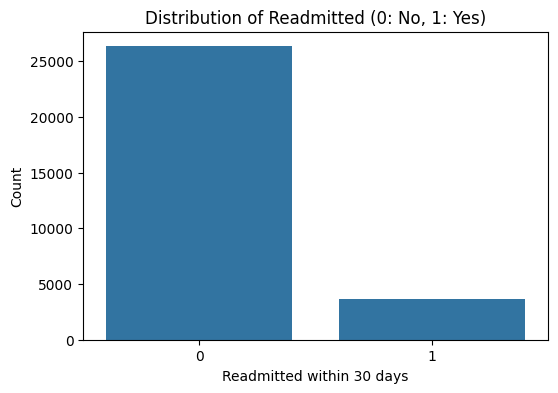

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='readmitted_30_days', data=df)
plt.title('Distribution of Readmitted (0: No, 1: Yes)')
plt.xlabel('Readmitted within 30 days')
plt.ylabel('Count')
plt.show()

## 📊 Visualize Confusion Matrix (Balanced Model)

We plot a heatmap of the confusion matrix for the balanced model to visually interpret the classification performance.


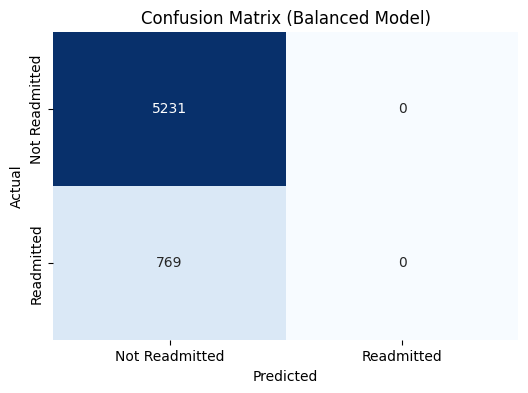

In [23]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_balanced, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Readmitted', 'Readmitted'],
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.title('Confusion Matrix (Balanced Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()